In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')

In [3]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [4]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


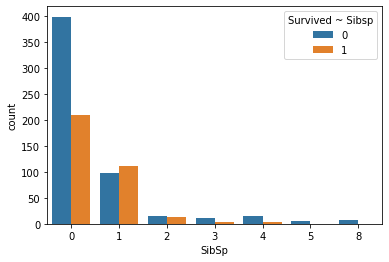

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'SibSp', hue = "Survived", data = train)
plt.legend(loc = "upper right", title = "Survived ~ Sibsp")

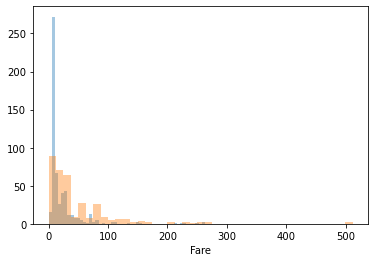

In [6]:
sns.distplot(train[train['Survived'] == 0].Fare, kde=False,rug=False)
sns.distplot(train[train['Survived'] == 1].Fare,  kde=False,rug=False)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.drop(['PassengerId','Name','Cabin','Ticket', ], axis=1, inplace=True)
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

In [9]:
train['Alone']=np.where((train["SibSp"]+train["Parch"])>0, 0, 1)
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [10]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [11]:
training = pd.get_dummies(train, columns=["Pclass","Embarked","Sex"], drop_first=True)
training

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,1
887,1,19.0,30.0000,1,0,0,0,1,0
888,0,28.0,23.4500,0,0,1,0,1,0
889,1,26.0,30.0000,1,0,0,0,0,1


In [12]:
from sklearn.preprocessing import StandardScaler
train_standard = StandardScaler()
train_copied = training.copy()
train_standard.fit(train_copied[['Age','Fare']])
train_std = pd.DataFrame(train_standard.transform(train_copied[['Age','Fare']]))
train_std

,0,1
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337
...,...,...
886,-0.181487,-0.386671
887,-0.796286,-0.044381
888,-0.104637,-0.176263
889,-0.258337,-0.044381


In [13]:
training[['Age','Fare'] ] = train_std
training

,Survived,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,-0.565736,-0.502445,0,0,1,0,1,1
1,1,0.663861,0.786845,0,0,0,0,0,0
2,1,-0.258337,-0.488854,1,0,1,0,1,0
3,1,0.433312,0.420730,0,0,0,0,1,0
4,0,0.433312,-0.486337,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,-0.181487,-0.386671,1,1,0,0,1,1
887,1,-0.796286,-0.044381,1,0,0,0,1,0
888,0,-0.104637,-0.176263,0,0,1,0,1,0
889,1,-0.258337,-0.044381,1,0,0,0,0,1


In [14]:
from sklearn.linear_model import LogisticRegression
cols = ["Age","Fare","Alone","Pclass_2","Pclass_2","Embarked_Q","Embarked_S","Sex_male"] 
X = training[cols]
y = training['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
model.fit(X,y)

LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score
train_predicted = model.predict(X)
accuracy_score(train_predicted, y)

0.7833894500561167

In [16]:
test = pd.read_csv('../input/titanic/test.csv')

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test.drop(['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)
test["Age"].fillna(28, inplace=True)
test["Embarked"].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)
test["Fare"].fillna(train.Fare.median(), inplace=True)
test['Alone']=np.where((test["SibSp"]+test["Parch"])>0, 0, 1)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)
testing=pd.get_dummies(test, columns=["Pclass","Embarked","Sex"], drop_first=True)
print(testing.dtypes)
test_copied = testing.copy()
test_std = train_standard.transform(test_copied[['Age','Fare']])
test_std
testing[['Age','Fare']] = test_std
testing

Age           float64
Fare          float64
Alone           int64
Pclass_2        uint8
Pclass_3        uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_male        uint8
dtype: object


,Age,Fare,Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.394887,-0.490783,1,0,1,1,0,1
1,1.355510,-0.507479,0,0,1,0,1,0
2,2.508257,-0.453367,1,1,0,1,0,1
3,-0.181487,-0.474005,1,0,1,0,1,1
4,-0.565736,-0.401017,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
413,-0.104637,-0.486337,1,0,1,0,1,1
414,0.740711,1.544246,1,0,0,0,0,0
415,0.702286,-0.502445,1,0,1,0,1,1
416,-0.104637,-0.486337,1,0,1,0,1,1


In [19]:
cols = ["Age","Fare","Alone","Pclass_2","Pclass_2","Embarked_Q","Embarked_S","Sex_male"] 
X_test=testing[cols]
print(X_test.dtypes)
test_predicted = model.predict(X_test)

Age           float64
Fare          float64
Alone           int64
Pclass_2        uint8
Pclass_2        uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_male        uint8
dtype: object


In [20]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')

In [21]:
sub['Survived'] = list(map(int, test_predicted))
sub.to_csv('submission.csv', index=False)